<a href="https://colab.research.google.com/github/Mohitvenkatasai/Accidents/blob/main/Accident_data_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the neccessary Libraries for analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Reading the first 5 rows from the data

In [ ]:
df=pd.read_csv('accident data_new.csv',index_col=0)
df.head()

,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Index,,,,,,,,,,,,,
200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1.0,2.0,Dry,Single carriageway,Urban,Fine no high winds,Car
200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1.0,2.0,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1.0,3.0,Dry,NaN,Urban,NaN,Taxi/Private hire car
200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1.0,4.0,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1.0,2.0,Dry,NaN,Urban,NaN,Other vehicle


In [ ]:
df['Number_of_Casualties'].unique()

array([ 1.,  2.,  3.,  5.,  9.,  4., nan,  7.,  6.,  8., 16., 40., 11.,
       22., 13., 25., 10., 28., 19., 18., 15., 29., 14., 42., 68., 12.,
       17., 27., 32., 21., 62., 45., 47., 48., 24., 26., 43.])

### Reading the last 5 rows from the data

In [ ]:
df.tail()

,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Index,,,,,,,,,,,,,
201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2.0,1.0,Dry,Single carriageway,Rural,Fine no high winds,Car
201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1.0,1.0,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1.0,3.0,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1.0,2.0,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc
201091NM02142,Serious,28-02-2022,57.575210,Daylight,Highland,-3.895673,1.0,1.0,Wet or damp,Dual carriageway,Rural,Snowing no high winds,Car


### Reading  information of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660679 entries, 200701BS64157 to 201091NM02142
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Severity        660679 non-null  object 
 1   Accident Date            660679 non-null  object 
 2   Latitude                 660654 non-null  float64
 3   Light_Conditions         660679 non-null  object 
 4   District Area            660679 non-null  object 
 5   Longitude                660653 non-null  float64
 6   Number_of_Casualties     660638 non-null  float64
 7   Number_of_Vehicles       660620 non-null  float64
 8   Road_Surface_Conditions  659912 non-null  object 
 9   Road_Type                656094 non-null  object 
 10  Urban_or_Rural_Area      660627 non-null  object 
 11  Weather_Conditions       646499 non-null  object 
 12  Vehicle_Type             660668 non-null  object 
dtypes: float64(4), object(9)
memory usage: 70.6+ 

##### The data type of Accident Date column is object but that column includes values in Date format so need to convert the data type of the column into datetime format
###### Number of Casualities and Number of vehicles both have Int types, but showing as float. Need to convert the data type

### Checkig the shape of the data

In [ ]:
df.shape

(660679, 13)

###### There are 660679 rows and 13 columns in total data.

### Checking the stastical infromation of the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660638.0,1.357061,0.824867,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660620.0,1.831271,0.715283,1.000000,1.000000,2.000000,2.000000,32.000000


###### This is the statistical information of all the numeric data in data-set
###### Latitue- The mean 52.22 the 25 pecentile is 51 and 75 percentile is 53.45 but the max is 60.75 which means we have a outliers need to remove.
###### Longitude- The mean -1.43 the 25 pecentile is -2.33 and 75 percentile is -0.23 but the max is 1.76 which means we have a outliers need to remove.
###### Number_of_casualities- The mean 1.35 the 25 pecentile is 1 and 75 percentile is 1 but the max is 68 which means we have a outliers need to remove.
##### Number_of_Vehicles- The mean 1.83 the 25 pecentile is 1 and 75 percentile is 1 but the max is 32 which means we have a outliers need to remove.


### Checking only the Categorical information

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Accident_Severity,660679,3,Slight,563801
Accident Date,660679,1461,30-11-2019,704
Light_Conditions,660679,5,Daylight,484880
District Area,660679,422,Birmingham,13491
Road_Surface_Conditions,659912,5,Dry,447790
Road_Type,656094,5,Single carriageway,492095
Urban_or_Rural_Area,660627,3,Urban,421626
Weather_Conditions,646499,8,Fine no high winds,520840
Vehicle_Type,660668,16,Car,497986


### Checking for duplicate values

In [ ]:
df.duplicated().sum()

52

##### We can observe that there are 52 dulplicate values the entire

In [ ]:
df.drop_duplicates(inplace=True)

##### Dropping the duplicate values

### Checking if the data have any null values in each columnn

In [ ]:
df.isnull().sum()

Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties          41
Number_of_Vehicles            59
Road_Surface_Conditions      767
Road_Type                   4585
Urban_or_Rural_Area           52
Weather_Conditions         14179
Vehicle_Type                  11
dtype: int64

###### We can see that there are null values in almost every column in the data. So we need to check what is the percentage of null values are there in each column.If we have morethan 25% we need to remove the column.

### Checking what is the percentage of null values have in each column

In [ ]:
df.isnull().sum()/df.shape[0]*100

Accident_Severity          0.000000
Accident Date              0.000000
Latitude                   0.003784
Light_Conditions           0.000000
District Area              0.000000
Longitude                  0.003936
Number_of_Casualties       0.006206
Number_of_Vehicles         0.008931
Road_Surface_Conditions    0.116102
Road_Type                  0.694038
Urban_or_Rural_Area        0.007871
Weather_Conditions         2.146294
Vehicle_Type               0.001665
dtype: float64

##### As we can no column is having 25% or above that having null values so we are filling the null values.

### Checking for Outliers for numerical columns and fill the null values with median

<Axes: >

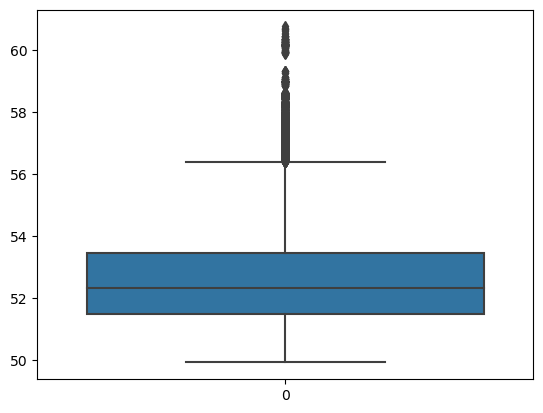

In [ ]:
sns.boxplot(df['Latitude'])

In [ ]:
df['Latitude'].fillna(df['Latitude'].median(),inplace=True)

<Axes: >

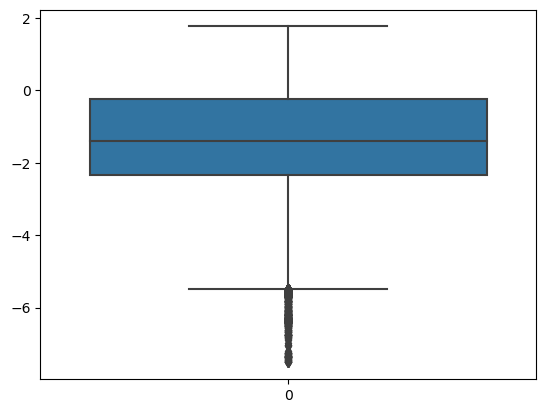

In [ ]:
sns.boxplot(df['Longitude'])

In [ ]:
df['Longitude'].fillna(df['Longitude'].median(),inplace=True)

<Axes: >

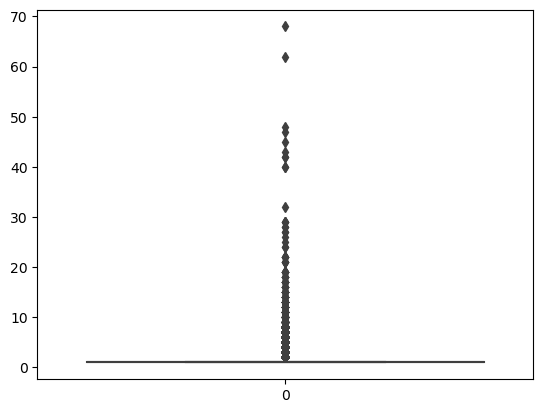

In [ ]:
sns.boxplot(df['Number_of_Casualties'])

In [ ]:
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].median(),inplace=True)

<Axes: >

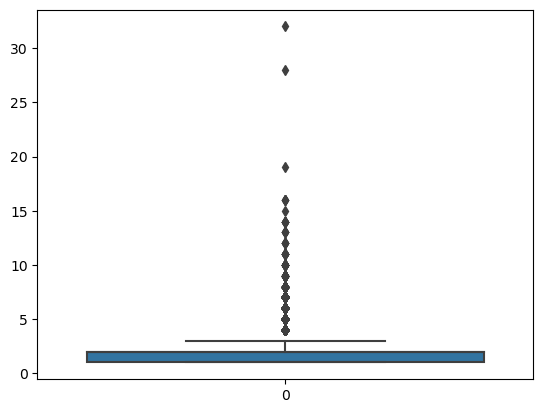

In [ ]:
sns.boxplot(df['Number_of_Vehicles'])

In [ ]:
df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].median(),inplace=True)

### Filling the null values of categorical columns with mode

In [ ]:
df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0],inplace=True)
df['Road_Type'].fillna(df['Road_Type'].mode()[0],inplace=True)
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0],inplace=True)
df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0],inplace=True)
df['Vehicle_Type'].fillna(df['Vehicle_Type'].mode()[0],inplace=True)


## Changing the data-types

#### Converting the Accident_Date column in DateTime format and assigning new cloums for Day,Month and Year:

In [ ]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%d-%m-%Y')
df['Accident_Day'] = df['Accident Date'].dt.day
df['Accident_Month'] = df['Accident Date'].dt.month
df['Accident_Year'] = df['Accident Date'].dt.year

#### Changing the data types from float to int for Number_of_Casualties and Number_of_Vehicles columns:

In [ ]:
df['Number_of_Casualties']=df['Number_of_Casualties'].astype(int)
df['Number_of_Vehicles']=df['Number_of_Vehicles'].astype(int)

### Checking for the changes made in the data.

In [ ]:
df.head()

,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident_Day,Accident_Month,Accident_Year
Index,,,,,,,,,,,,,,,,
200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,5,6,2019
200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2,7,2019
200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,26,8,2019
200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),16,8,2019
200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,3,9,2019


### Data Visuliazation
#### Univariate

#### Ploting the percentage of accidents in urban and rural areas

<Axes: ylabel='count'>

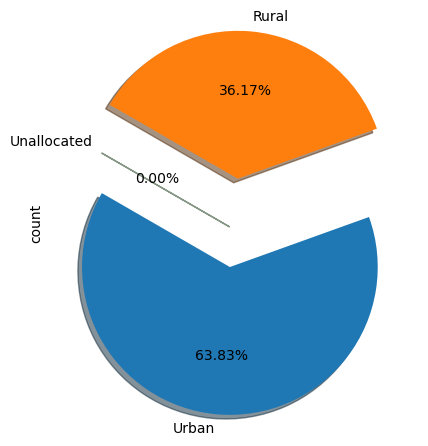

In [ ]:
df['Urban_or_Rural_Area'].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=150,shadow=True,explode=(0.3,0.3,0))

###### Urban Ares witnessed the heighest percentage of accidents with 68.83% and rural areas with36.17%

#### Ploting the highest number of vechile-type in accidents

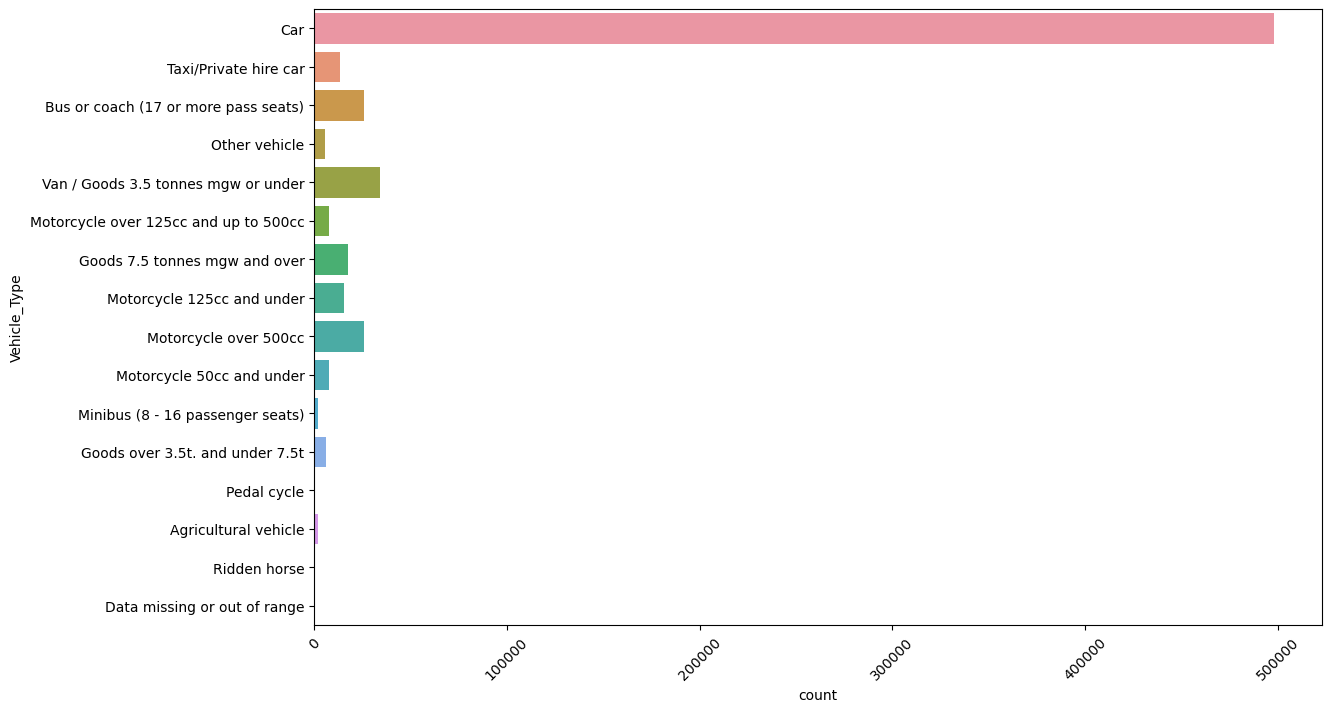

In [ ]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=45,fontsize=10)
a=sns.countplot(data=df,y='Vehicle_Type')

###### We can see that people who drive cars are having more number of accidents. Then Van/Goods with 3.5 ton or below have reported more number of accidents

#### Checking what is Accident severity

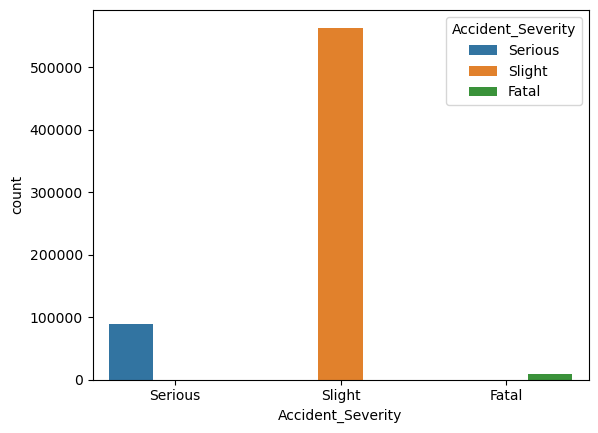

In [ ]:
a=sns.countplot(data=df,x='Accident_Severity',hue='Accident_Severity')

###### In most the accidents there are slight severity was recorded

#### Percentage of accidnets based on Road-Type

### Dropping duplicate Values

<Axes: ylabel='count'>

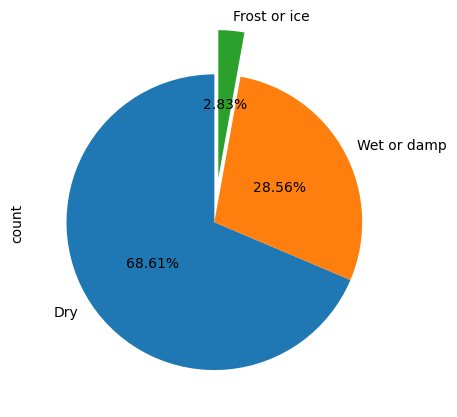

In [ ]:
df['Road_Surface_Conditions'].value_counts()[:3].plot(kind='pie',autopct='%1.2f%%',startangle=90,explode=(0,0,0.3),pctdistance=0.5)

###### we can see that more number of accidents are happend on dry road-surface.

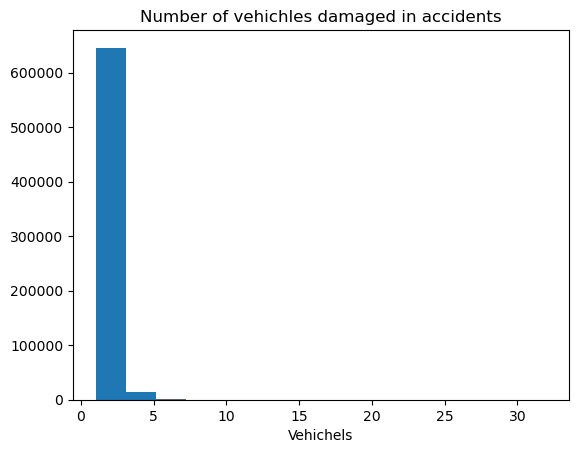

In [ ]:
plt.hist(df['Number_of_Vehicles'],bins=15)
plt.title('Number of vehichles damaged in accidents')
plt.xlabel('Vehichels')
plt.show()

###### This repersents the number of vehicles damaged in each accidnet. We can see that only upto 5 vehicles are damaged in a given accident.

#### Top 10 distrcits and their percentages in the accidents

<Axes: ylabel='count'>

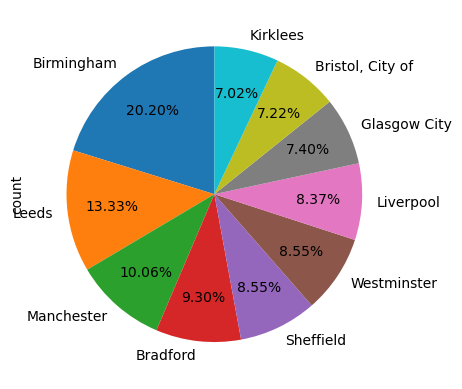

In [ ]:
df['District Area'].value_counts()[:10].plot(kind='pie',autopct='%1.2f%%',startangle=90,pctdistance=0.7)

###### These are the top ten districts where the most of the accidents had taken place.

#### Bivariate

### Checking for duplicate values after droping

#### Chechking the relation-ship for all the numeric data

<Axes: >

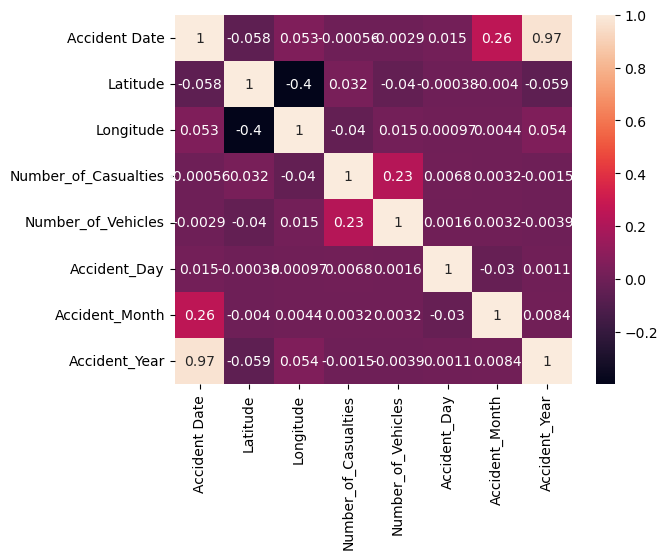

In [ ]:
c=pd.DataFrame(df[['Accident Date','Latitude','Longitude','Number_of_Casualties','Number_of_Vehicles','Accident_Day','Accident_Month','Accident_Year']])
cor=c.corr()
sns.heatmap(cor,annot=True)

###### As a part of analysis we used heatmap to check if there are any columns or features which are correalated strongly so that it will be helpful for analysis.

#### Checking with wather conditions

<Axes: xlabel='Weather_Conditions', ylabel='Number_of_Casualties'>

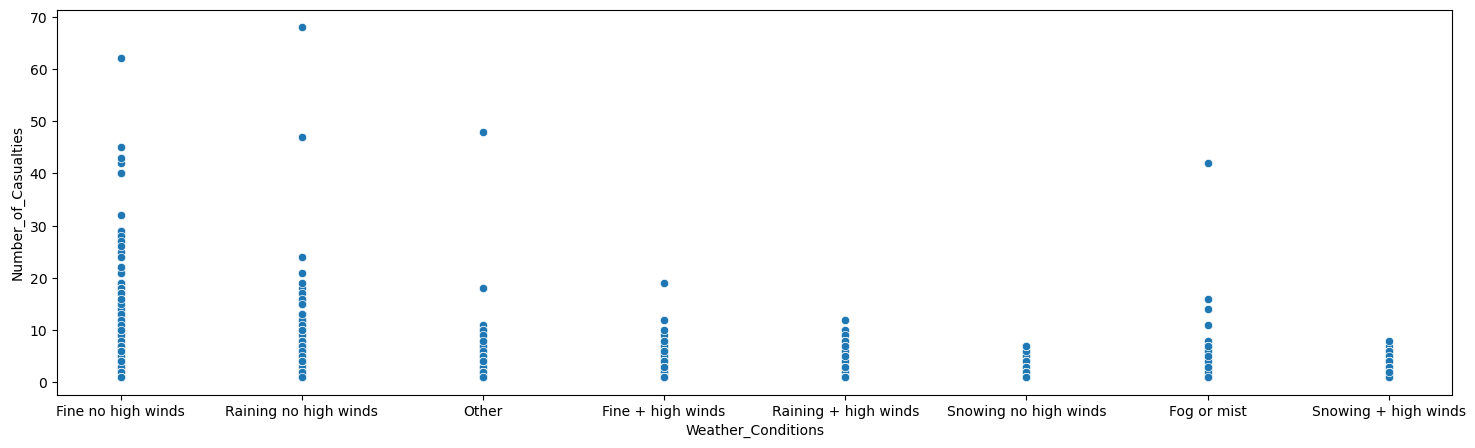

In [ ]:
plt.figure(figsize=(18,5))
sns.scatterplot(x='Weather_Conditions',y='Number_of_Casualties',data=df)

###### There more accidents have recorded on a fine and Rainy day with no high winds.

#### Checking with light conditions

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Darkness - lights lit'),
  Text(1, 0, 'Daylight'),
  Text(2, 0, 'Darkness - lighting unknown'),
  Text(3, 0, 'Darkness - lights unlit'),
  Text(4, 0, 'Darkness - no lighting')])

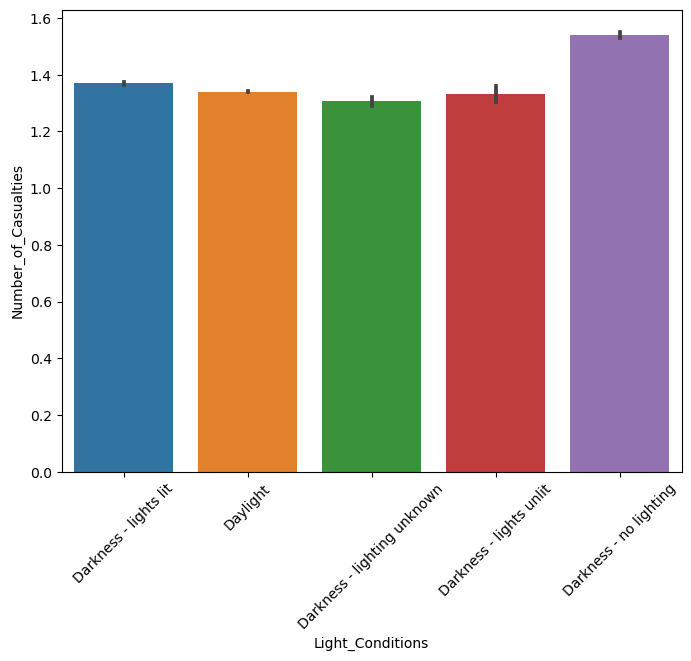

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Light_Conditions',y='Number_of_Casualties',data=df)
plt.xticks(rotation=45)

###### As we can see this plot Accidents are more when there is no-light in drakess.

#### Ploting Year-on-Year accidents using Number_of_Casualties columns

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x700 with 0 Axes>

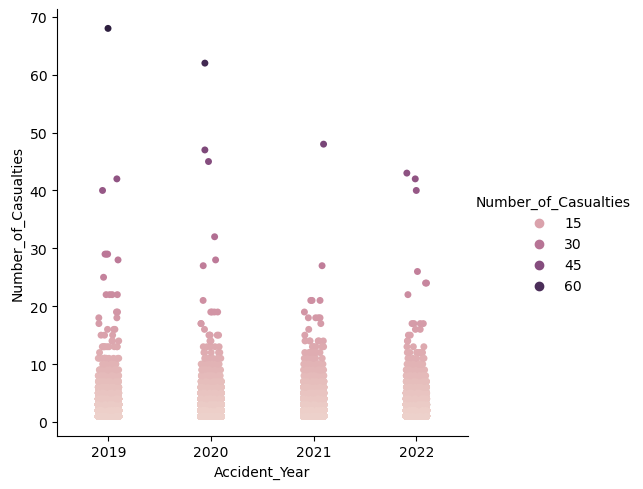

In [ ]:
plt.figure(figsize=(18,7))
sns.catplot(x='Accident_Year',y='Number_of_Casualties',data=df,hue='Number_of_Casualties')

###### We can see that the number of accidents have reduced year-on-year which is a positive sign

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


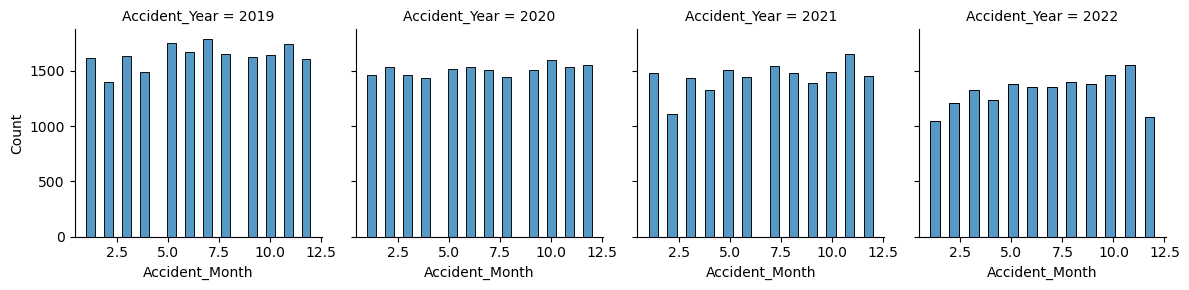

In [ ]:
a=sns.FacetGrid(df,col='Accident_Year')
a.map_dataframe(sns.histplot,x='Accident_Month')

###### The number of casualities are decreasing year on year from past 4 years.

### Multi-varite analysis


#### Checking Number_of_Casualties, road condition and severity in each road condition when the accident happend

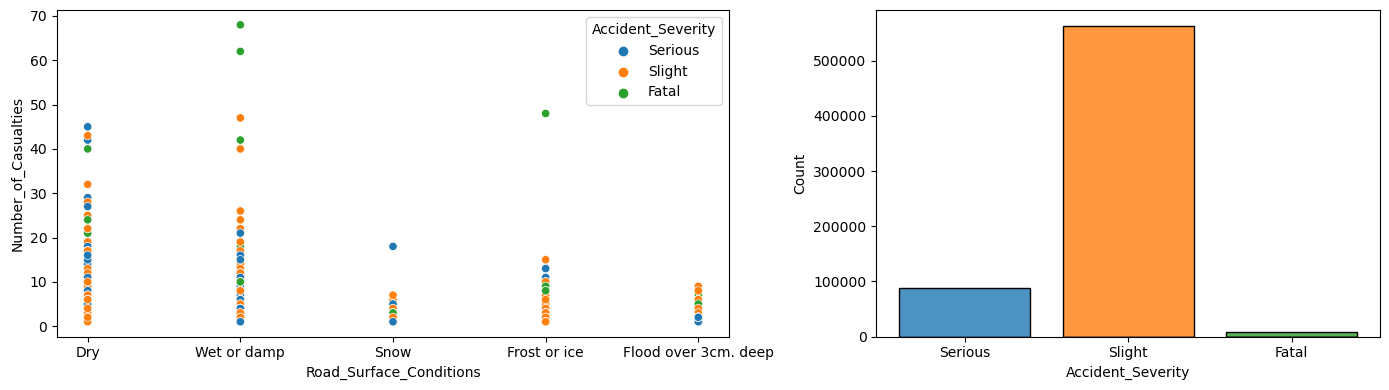

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x="Road_Surface_Conditions", y="Number_of_Casualties",hue='Accident_Severity',ax=axs[0])
sns.histplot(data=df, x="Accident_Severity", hue='Accident_Severity', shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

###### This shows the number of caualities with weather conditions and accident severity. There are silght injuries happend in overal data, but we can observe the fatal rate is more when the road is wet or damp

#### Checking the number of accidents in each year in each month.

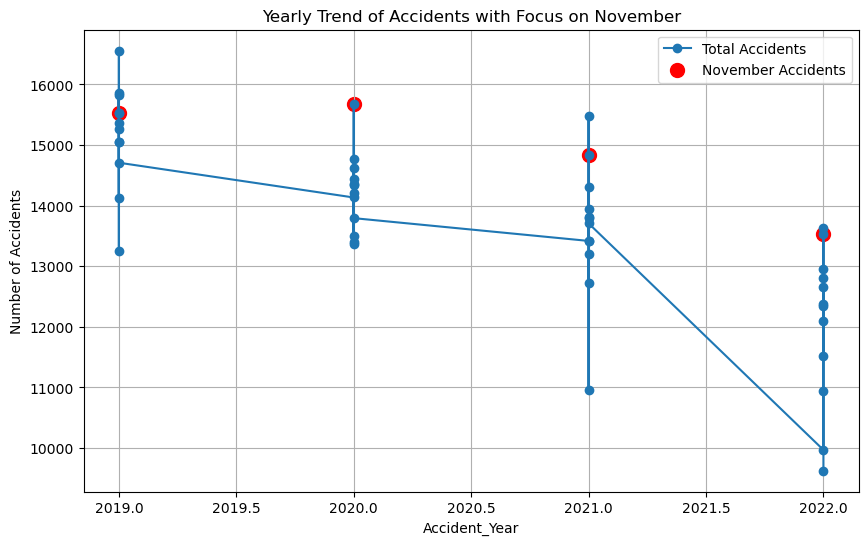

In [ ]:
monthly_counts = df.groupby(["Accident_Year", "Accident_Month"]).size().reset_index(name='Accident_Count')

august_data = monthly_counts[monthly_counts['Accident_Month'] == 10]

plt.figure(figsize=(10, 6))
plt.plot(monthly_counts['Accident_Year'], monthly_counts['Accident_Count'], label='Total Accidents', marker='o')
plt.scatter(august_data['Accident_Year'], august_data['Accident_Count'], color='red', label='November Accidents', s=100)
plt.title('Yearly Trend of Accidents with Focus on November')
plt.xlabel('Accident_Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Q1 = df['Latitude'].quantile(0.25)
Q3 = df['Latitude'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
df=df[(df['Latitude']>lower_bound)&(df['Latitude']<upper_bound)]
df


1.962737500000003
48.54659074999999
56.397540750000005


,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident_Day,Accident_Month,Accident_Year
Index,,,,,,,,,,,,,,,,
200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,5,6,2019
200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2,7,2019
200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,26,8,2019
200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),16,8,2019
200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,3,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201063DP42910,Slight,2022-12-21,52.514222,Daylight,Powys,-3.315171,1,1,Snow,One way street,Urban,Snowing no high winds,Car,21,12,2022
201063DP43110,Slight,2022-10-16,52.520103,Daylight,Powys,-3.303703,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,16,10,2022
201063DP43210,Slight,2022-11-08,51.861265,Daylight,Powys,-3.135571,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,8,11,2022


<Axes: >

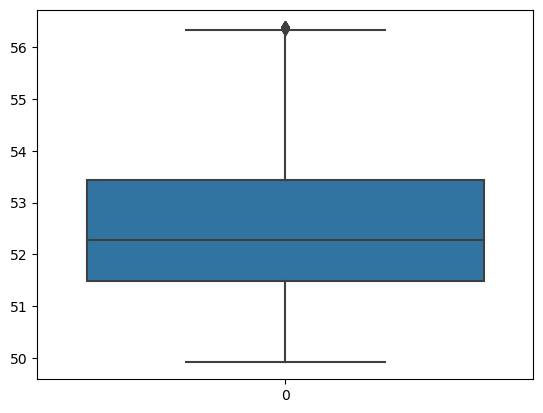

In [ ]:
sns.boxplot(df['Latitude'])

In [ ]:
Q1 = df['Longitude'].quantile(0.25)
Q3 = df['Longitude'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
df=df[(df['Longitude']>lower_bound)&(df['Longitude']<upper_bound)]
df


2.07108875
-5.401761875
2.882593125


,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident_Day,Accident_Month,Accident_Year
Index,,,,,,,,,,,,,,,,
200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,5,6,2019
200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2,7,2019
200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,26,8,2019
200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),16,8,2019
200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,3,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201063DP42910,Slight,2022-12-21,52.514222,Daylight,Powys,-3.315171,1,1,Snow,One way street,Urban,Snowing no high winds,Car,21,12,2022
201063DP43110,Slight,2022-10-16,52.520103,Daylight,Powys,-3.303703,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,16,10,2022
201063DP43210,Slight,2022-11-08,51.861265,Daylight,Powys,-3.135571,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,8,11,2022


<Axes: >

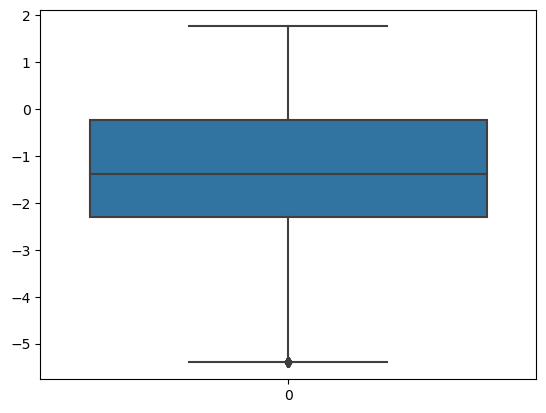

In [ ]:
sns.boxplot(df['Longitude'])

After removing outliers : Axes(0.125,0.11;0.775x0.77)


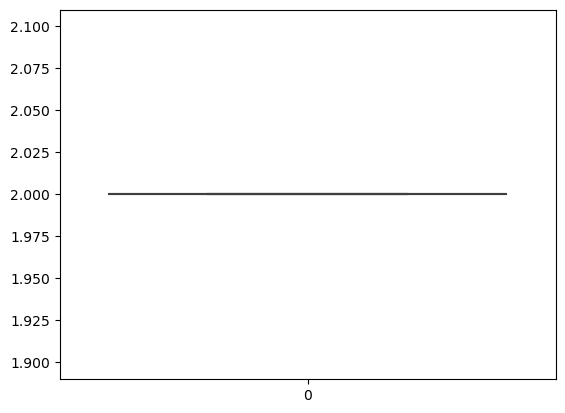

In [ ]:
lowerlimit=df['Number_of_Casualties'].quantile(0.05)
df[df['Number_of_Casualties']<lowerlimit]
upperlimit=df['Number_of_Casualties'].quantile(0.95)
df[df['Number_of_Casualties']>upperlimit]
df=df[(df['Number_of_Casualties'] > lowerlimit) & (df['Number_of_Casualties']< upperlimit)]
print("After removing outliers :",sns.boxplot(df['Number_of_Casualties']))

After removing outliers : Axes(0.125,0.11;0.775x0.77)


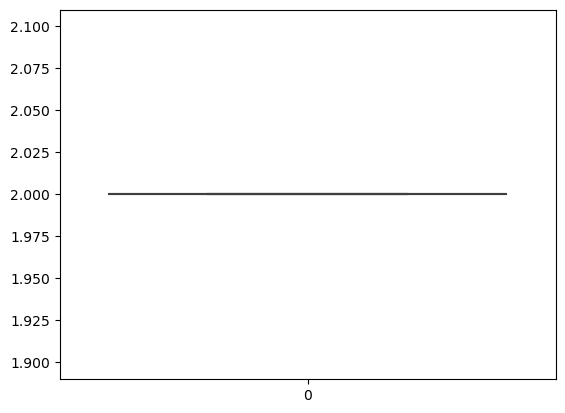

In [ ]:
lowerlimit=df['Number_of_Vehicles'].quantile(0.05)
df[df['Number_of_Vehicles']<lowerlimit]
upperlimit=df['Number_of_Vehicles'].quantile(0.95)
df[df['Number_of_Vehicles']>upperlimit]
df=df[(df['Number_of_Vehicles'] > lowerlimit) & (df['Number_of_Vehicles']< upperlimit)]
print("After removing outliers :",sns.boxplot(df['Number_of_Vehicles']))

# Conclusion

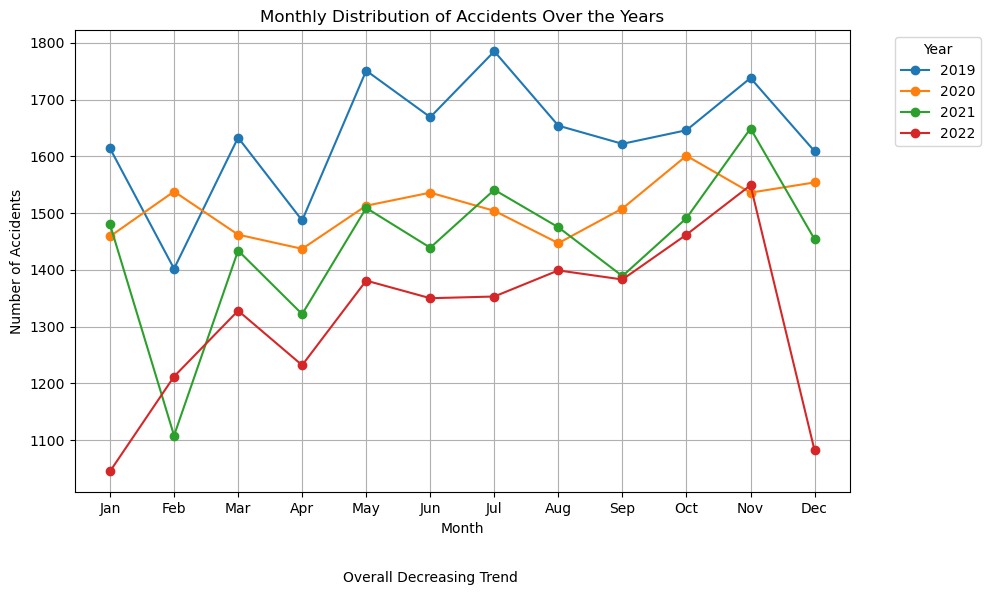

In [ ]:
monthly_counts = df.groupby(['Accident_Year', 'Accident_Month']).size().reset_index(name='Accident_Count')

plt.figure(figsize=(10, 6))
for year in monthly_counts['Accident_Year'].unique():
    year_data = monthly_counts[monthly_counts['Accident_Year'] == year]
    plt.plot(year_data['Accident_Month'], year_data['Accident_Count'], marker='o', label=str(year))


plt.text(6, 850, 'Overall Decreasing Trend', fontsize=10, ha='center')

plt.title('Monthly Distribution of Accidents Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Summary of analysis: The UK accident dataset shows a declining trend in annual accidents from 2019 to 2022,
#### with August consistently having the highest accident rates. Urban areas experience more accidents than rural ones,
#### emphasizing the need for targeted safety measures. Most casualties are slight, indicating ongoing efforts to reduce
#### injury severity. Surprisingly, accidents are more common on dry roads than wet or icy surfaces, but wet conditions,
#### especially during rainfall, result in higher severity and fatalities. Fine weather correlates with increased accidents,
#### possibly due to heightened outdoor activities. These insights highlight the need for ongoing monitoring and proactive
#### strategies to sustain and enhance road safety in the UK